In [7]:
from utils.robot import Robot
from utils.camera import Camera
#robot = Robot("COM9", "models\mlp_base.pkl")
camera = Camera(27, 0)

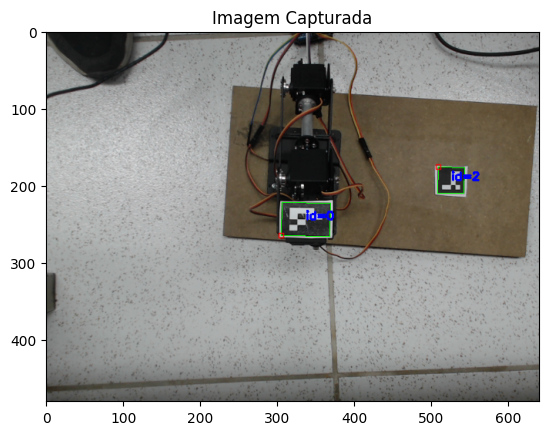

525 193 -9.45 3.474


In [3]:
camera.get_aruco_positions()
camera.get_aruco_positions()
xc_px, yc_px, xc, yc, diagonal = camera.get_aruco_positions(2, plot_image=True)
print(xc_px, yc_px, xc, yc)

In [8]:
camera.show_arucos()

In [9]:
camera.release()

x muito alto

y quase zero

In [10]:
import cv2

cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)

cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)        
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_250)
params = cv2.aruco.DetectorParameters()

ret, frame = cap.read()

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
corners, ids, _ = cv2.aruco.detectMarkers(gray, aruco_dict, parameters=params)

In [11]:
corners

(array([[[537.,  94.],
         [521.,  56.],
         [575.,  30.],
         [592.,  67.]]], dtype=float32),)

In [4]:
robot.go_to_display_position(
 xc_px, yc_px, xc, yc   
)

c:\Users\pedro\Documents\NOVOdeltadelta\pog\mlp-robot\.auto\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\pedro\Documents\NOVOdeltadelta\pog\mlp-robot\.auto\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\pedro\Documents\NOVOdeltadelta\pog\mlp-robot\.auto\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\pedro\Documents\NOVOdeltadelta\pog\mlp-robot\.auto\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Posições Preditas: axis0=121.41131438986595, axis1=-75.25852766616335, axis2=-96.83163197585701, axis3=-22.33746880959353
Comando enviado: 0:121.41131438986595, 1:-75.25852766616335, 2:-96.83163197585701, 3:-22.33746880959353


In [ ]:
import pickle

with open("models/mlp_base.pkl", "rb") as f:
    model = pickle.load(f)

min_max_value = {"xc_px": [-282.0, 293.0], "yc_px": [-53.0, 282.0], "xc": [-5.274, 5.076], "yc": [-0.954, 5.076]}

for column in min_max_value.keys():
    with open(f"scalers/{column}.pkl", "rb") as f:
        min_max_value[column] = pickle.load(f)

In [3]:
import numpy as np

In [4]:
xc_px = np.array([-275.0])

xc_px = min_max_value['xc_px'].transform([xc_px])[0][0]

xc_px

c:\Users\pedro\Documents\NOVOdeltadelta\pog\mlp-robot\.auto\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


0.012173913043478257

In [7]:
xc_px

array([[-158407., -158407.]])

In [3]:
xc_px, yc_px, xc, yc  = -275.0, 145.0, 4.95, 2.61

xc_px, yc_px, xc, yc = min_max_value['xc_px'].inverse_transform([xc_px]), min_max_value['yc_px'].reverse_min_max([yc_px]), min_max_value['xc'].inverse_transform([xc]), min_max_value['yc'].reverse_min_max([yc])
                
predicted_angles = model.predict([[xc_px, yc_px, xc, yc]])
t0, t1, t2, t3 = predicted_angles[0]
print(f"Posições Preditas: axis0={t0}, axis1={t1}, axis2={t2}, axis3={t3}")

ValueError: Expected 2D array, got 1D array instead:
array=[-275.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.